In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/fer2013.tar.gz
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/example_submission.csv
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/test.csv


In [3]:
# Load datasets
train_data = pd.read_csv('/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv')
test_data = pd.read_csv('/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/test.csv')

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
# Extract image data and labels from training data
X_train_pixels = np.array([np.fromstring(pixel, sep=' ') for pixel in train_data['pixels']])
y_train = train_data['emotion']

In [6]:
# Reshape and normalize image data for training
X_train_images = X_train_pixels.reshape(-1, 48, 48, 1) / 255.0

In [7]:
# Prepare test image data (no labels provided)
X_test_pixels = np.array([np.fromstring(pixel, sep=' ') for pixel in test_data['pixels']])
X_test_images = X_test_pixels.reshape(-1, 48, 48, 1) / 255.0

In [8]:
# One-hot encode labels for training set
encoder = LabelEncoder()
y_train_encoded = to_categorical(encoder.fit_transform(y_train))

In [9]:
# Split data for training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_images, y_train_encoded, test_size=0.2, random_state=42
)

In [10]:
# CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train_encoded.shape[1], activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.2326 - loss: 1.8564 - val_accuracy: 0.3664 - val_loss: 1.6121
Epoch 2/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3450 - loss: 1.6389 - val_accuracy: 0.4289 - val_loss: 1.5050
Epoch 3/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4049 - loss: 1.5230 - val_accuracy: 0.4570 - val_loss: 1.4352
Epoch 4/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4350 - loss: 1.4552 - val_accuracy: 0.4808 - val_loss: 1.3765
Epoch 5/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4559 - loss: 1.4221 - val_accuracy: 0.4845 - val_loss: 1.3513
Epoch 6/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4777 - loss: 1.3675 - val_accuracy: 0.4779 - val_loss: 1.3570
Epoch 7/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4962 - loss: 1.3253 - val_accuracy: 0.4904 - val_loss: 1.3325
Epoch 8/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4964 - loss: 1.3129 - val_accuracy: 

In [13]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5169 - loss: 1.6637
Validation Loss: 1.6971, Validation Accuracy: 0.5157


In [14]:
# Predict on test data
test_predictions = model.predict(X_test_images)
predicted_classes = np.argmax(test_predictions, axis=1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


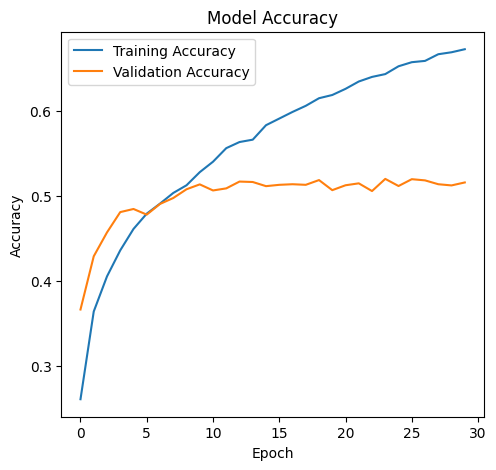

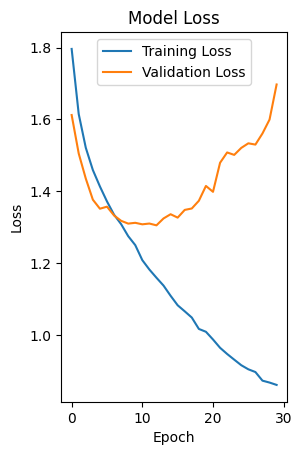

In [15]:

# # Visualization - Accuracy over Epochs
# plt.figure(figsize=(10, 5))
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualization - Loss over Epochs
# plt.figure(figsize=(10, 5))
# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

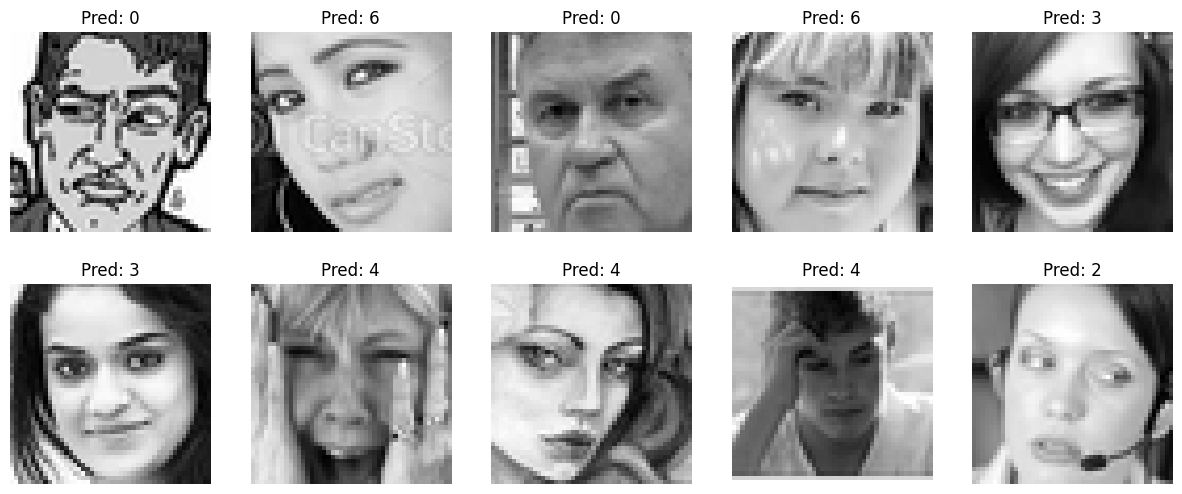

In [16]:
# Displaying some test predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(X_test_images[i].reshape(48, 48), cmap='gray')
    axes[i].set_title(f"Pred: {predicted_classes[i]}")
    axes[i].axis('off')
plt.show()

In [17]:
# Print predicted classes for first 10 images
print("Sample Predicted Emotion Classes (First 10):", predicted_classes[:10])

Sample Predicted Emotion Classes (First 10): [0 6 0 6 3 3 4 4 4 2]
